# Assignment 2: Clustering California Housing with K-means

### CS 4774 Machine Learning - Department of Computer Science - University of Virginia
"Tonight, more than 130,000 Californians will go to sleep homeless. That’s enough to fill Dodger Stadium, AT&T Park and Petco Park. The biggest culprit is rising housing costs. From 2000 to 2014, median rent in California increased by more than one-third, while real incomes for renters fell by 7 percent. Today, 1.5 million Californians spend more than half their income on housing. This crisis threatens not just low-income families but our entire economy, driving businesses to relocate to states in which their employees can afford to live. - **Business Insider, Sep 2018.**"

![Half of the homes in San Franciso is now one million or above](https://amp.businessinsider.com/images/573de0b88d3eaea27198a55d-960-480.jpg)

In this assignment, you will attempt to cluster the California Housing by implementing and analyzing the k-means algorithm to the data. K-Means is one of the most popular clustering algorithms. K-means stores k-centroids that it uses to define clusters. A point is considered to be in a particular cluster if it is closer to that cluster's centroid than any other centroid. For references, you may refer to my lecture 9 or Chapter 2 of the textbook if you need additional sample codes to help with your assignment. For deliverables, you must write code in Python and submit this Jupyter Notebook file (.ipynb) to earn a total of 100 pts. You will gain points depending on how you perform in the following sections.

**Note**: In order for your assignment to be graded, you must save your Notebook filename under this format: **yourUvaUserId_assignment_2_kmeans.ipynb**.


---
## 1. PRE-PROCESSING THE DATA (10 pts)

Download the California Housing dataset from the below link. This dataset includes statistics about the median income, median age, average number of rooms per person, average number of persons in a household etc. The statistics were gathered per geographical block.

**Data Acquiring:** Download the dataset from https://www.kaggle.com/camnugent/california-housing-prices

**Data Discovery, Visualization, and Cleaning:** Fortunately, this step have been given to you from chapter 2. However, you should review them and write the code necessary for the purposes of this assignment. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


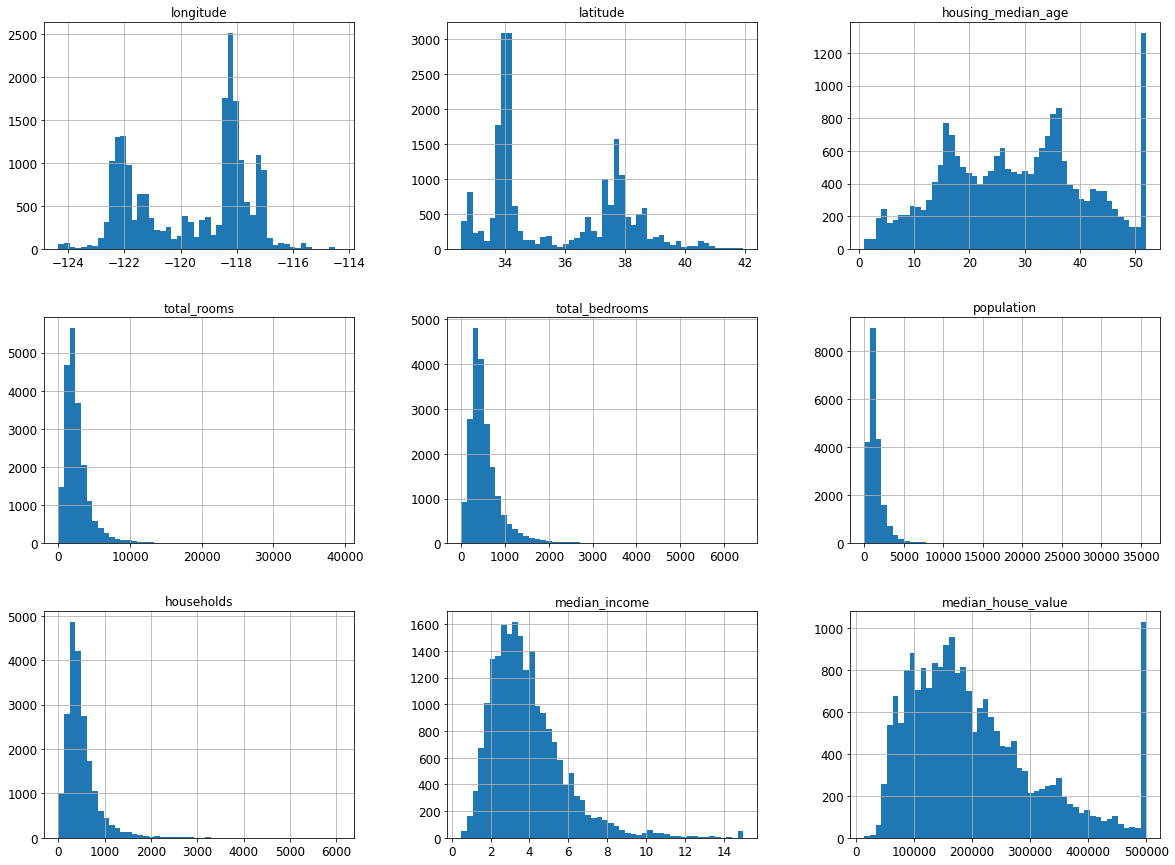

(16512, 10)
(4128, 10)


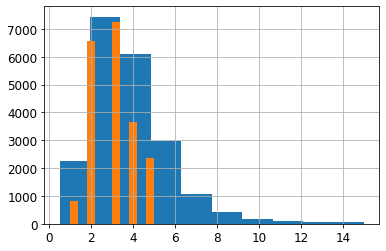

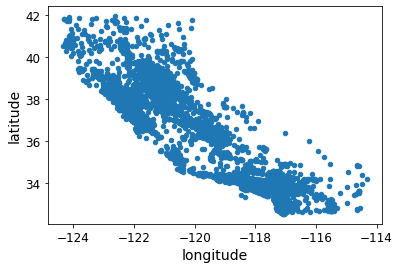

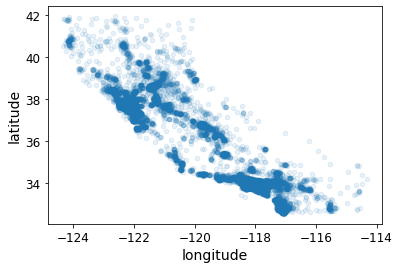

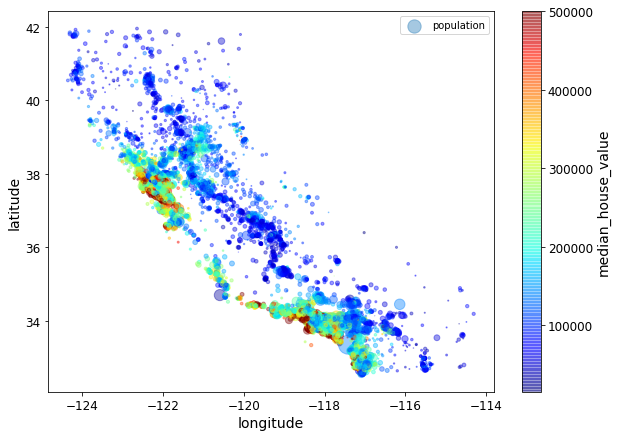

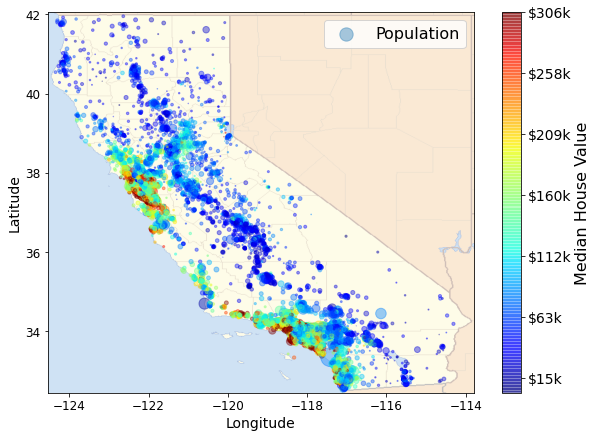

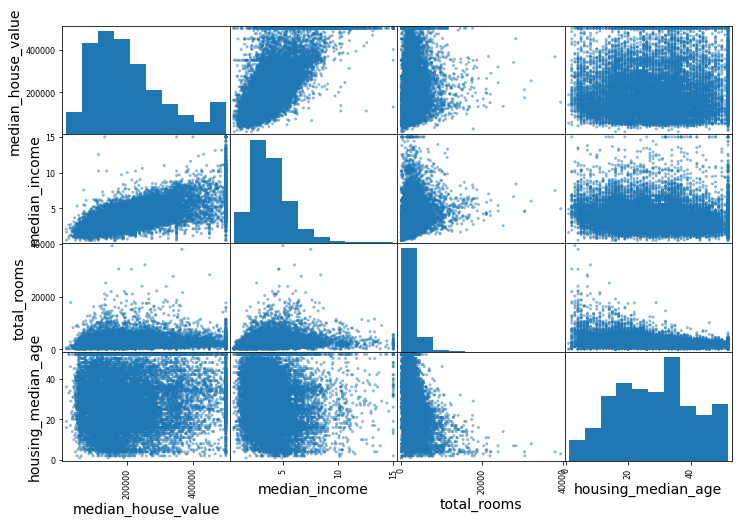

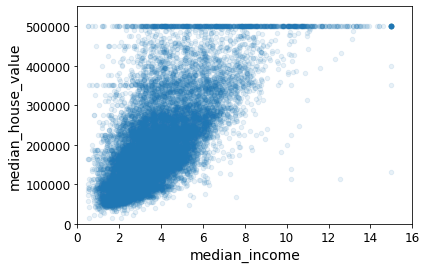

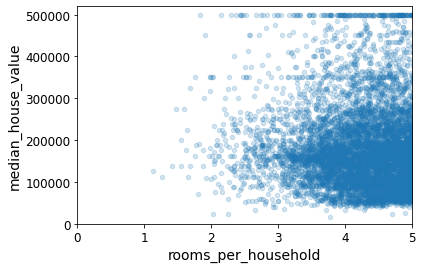

[[-121.89     37.29     38.     ...  710.      339.        2.7042]
 [-121.93     37.05     14.     ...  306.      113.        6.4214]
 [-117.2      32.77     31.     ...  936.      462.        2.8621]
 ...
 [-116.4      34.09      9.     ... 2098.      765.        3.2723]
 [-118.01     33.82     31.     ... 1356.      356.        4.0625]
 [-122.45     37.77     52.     ... 1269.      639.        3.575 ]]
(16512, 9)
(16512, 16)


array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

In [1]:
# You might want to use the following package
import sklearn
import numpy as np
import os
import random
from pandas.plotting import scatter_matrix # optional
#from sklearn.preprocessing import Imputer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.compose import ColumnTransformer
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.image as mpimg
# Your code goes here for this section.
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import tarfile # to support compressed (tar) files
from six.moves import urllib # support URL download

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    """Fetch housing data from a remote URL to Colab file system"""
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

fetch_housing_data()

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "kmeans"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
  """Save the selected figure into disc under an image extention and resolution

  Parameters
  ----------
  fig_id : figure handle
    The id number of the figure
  tight_layout : boolean (True or False)
    Specifies whenther the layout should be tight or not
  fig_extension: string
    Under what extension should the file be saved ("png" or "jpg")
  resolution: int
    the quality of the figure (ie. 100,200,300)

  Returns
  -------
  void
    Does not return any value
  """

  path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
  print("Saving figure", fig_id)
  if tight_layout:
    plt.tight_layout()
  plt.savefig(path, format=fig_extension, dpi=resolution)

def load_housing_data(housing_path=HOUSING_PATH):
  """Load Housing Data into Workspace from a CSV"""
  csv_path = os.path.join(housing_path, "housing.csv")
  return pd.read_csv(csv_path)

housing = load_housing_data()
# Display the first n rows of the data. (n=5 by default, we will use 10 rows)
housing.head(10)

# Provide a quick summary of the data including name of features, count, and type
housing.info()

# View the counts of each value in the "ocean_proximity" feature
housing["ocean_proximity"].value_counts()

# Provide some basic statistics about the dataset
housing.describe()

housing.hist(bins=50, figsize=(20,15))
plt.show()
#save_fig("attribute_histogram_plots")

# Split the data into train set (80%) and test set (20%)
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

print( train_set.shape )
print( test_set.shape ) # No peeking at the test data though (data snooping bias)

housing["median_income"].hist()

# Since this histogram is "tail heavy" (extends much farther to the right from the median and to the left)
# We will try to transform this atrribute to have a more bell-shaped distribution
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

housing["income_cat"].value_counts()

housing["income_cat"].hist()

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

strat_test_set["income_cat"].value_counts() / len(strat_test_set)

housing["income_cat"].value_counts() / len(housing)

for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis = 1, inplace=True)

# Make a copy of the stratified train set
housing = strat_train_set.copy()

housing.plot(kind="scatter", x="longitude", y="latitude")
# save_fig("bad_visualization_plot")

# Add alpha channel for transparent so that the plot is less crowded.
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
# save_fig("better_visualization_plot")

# Incorporate the population into the circle size
# Add color (jet map) for the value of the housing
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()
# save_fig("housing_prices_scatterplot")

# Read the image of California (make sure you have it in the directory)
california_img=mpimg.imread(PROJECT_ROOT_DIR + '/california.png')
ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                       s=housing['population']/100, label="Population",
                       c="median_house_value", cmap=plt.get_cmap("jet"),
                       colorbar=False, alpha=0.4,
                      )
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar()
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16)
# save_fig("california_housing_prices_plot")
plt.show()

# Use corr() to see the correlations (aka Standard Correlation Coefficient or Pearson's r) among the features of the dataset
corr_matrix = housing.corr()
corr_matrix.shape

# Let's look at how much each feature correlates to the house value 
corr_matrix["median_house_value"].sort_values(ascending=False)

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))
# save_fig("scatter_matrix_plot")

housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1)
plt.axis([0, 16, 0, 550000])
# save_fig("income_vs_house_value_scatterplot")

housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]
housing.shape

corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

housing.plot(kind="scatter", x="rooms_per_household", y="median_house_value",
             alpha=0.2)
plt.axis([0, 5, 0, 520000])
plt.show()

housing.describe()

# Create the features and labels for training
housing = strat_train_set.drop("median_house_value", axis=1) # drop labels for training set
housing_labels = strat_train_set["median_house_value"].copy()

# Check to see if there's any missing value in the data with .isnull()
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

# One option for dealing with missing data is just removing examples which contains the missing data
# with .dropna() only the examples with missing values are dropped 
sample_incomplete_rows.dropna(subset=["total_bedrooms"])    # option 1

# Another way to drop the whole feature using drop() (Will you miss that feature?)
sample_incomplete_rows.drop("total_bedrooms", axis=1)       # option 2

# Third option is to fill the missing values with something reasonable (zero, mean, median, ect)
# .fillna() will get this done
median = housing["total_bedrooms"].median()
sample_incomplete_rows["total_bedrooms"].fillna(median, inplace=True) # option 3

sample_incomplete_rows

imputer = SimpleImputer(strategy="median")

housing_num = housing.drop("ocean_proximity", axis=1)
# alternatively: housing_num = housing.select_dtypes(include=[np.number])

imputer.fit(housing_num)

imputer.statistics_

housing_num.median().values

X = imputer.transform(housing_num)
print(X)

housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing.index)

housing_tr.loc[sample_incomplete_rows.index.values]

imputer.strategy

housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing_num.index)

housing_tr.head()

# Isolate ocean proximity to its own variable
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

# OrdinalEncoder encodes consecutive numbers for the categories (5 categories --> 0,1,2,3,4)
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

ordinal_encoder.categories_

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

housing_cat_1hot.toarray()

cat_encoder = OneHotEncoder(sparse=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

cat_encoder.categories_

from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

# When set to false, that feature will not be added --> so here it adds two features only
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

housing_num_tr

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)
#housing_test_prep = full_pipeline.transform(strat_test_set)
# housing_prepared
print(housing.shape)
print(housing_prepared.shape)

housing_prepared


- - -
## 2. IMPLEMENTING K-MEANS (40 pts)

You must implement your own version of K-Means Algorithm. Input a cluster count K and M data points each with its own vector of N features, along with the choice of a distance measure; then:

1. Initialize K centroids. In our case, a centroid is just the average of all data in a cluster.
2. Assign each data point to the cluster that has the closest centroid base on a **distance measure** below.
3. After all data points have been assigned to clusters, recalculate the centroids for each cluster (as averages of all points in the cluster).
4. Repeat the data assignments and centroid calculations until no change in housing assignment occurs between iterations.

**Distance Measures:** Your implementation must include three distance metrics: Manhattan Distance, Euclidean Distance, Sup Distance. These 3 distance metrics can be generalized by the Minkovski Distance:
$D(\mathbf{x},\mathbf{y}) = \sqrt[\leftroot{2}\uproot{2}p]{\sum\limits_{i=1}^n|x_i - y_i|^p}$ where $p=1$ for Mahattan, $p=2$ for Euclidean, and $p=\infty$ for Sup Distance.

**Implementation Notes:** Note that your functions should return distance measures; that is, the returned value should be high if the two vectors are dissimilar, low if they are similar, and zero if they are completely identical.

In [25]:
# Function: K Means
# -------------
# K-Means is an algorithm that takes in a dataset and a constant
# k and returns k centroids (which define clusters of data in the
# dataset which are similar to one another).

class K_means:
  #centroid initialization
   
  def __init__(self, dataset, num_centroids, p):
    dataset1 = dataset[::]
    #print(dataset1.shape , " dataset1.shape")
    self.dataset = dataset1
    self.num_centroids = num_centroids
    self.p = p
  
  def create_cent_matrix(self):
    centroid_matr = [0]*self.num_centroids
    for t in range(self.num_centroids):
      m = random.randint(0,len(self.dataset))
      centroid_matr[t] = self.dataset[m]
    return centroid_matr
  
  #distance calculation
  def calculate_distance(self,centroid,i):
    if self.p == 1:
      sum_manhattan = 0
      sum_manhattan = np.power(np.linalg.norm(centroid-self.dataset[i]),1)
        #sum_manhattan = np.linalg.norm(sum_manhattan)
      return np.power(sum_manhattan,1)
    elif self.p == 2:
      sum_euclid = 0
      sum_euclid = np.power(np.linalg.norm(centroid-self.dataset[i]),2)
        #sum_euclid = np.linalg.norm(sum_euclid)
      return np.power(sum_euclid,0.5)
    else:
      sum_sup = 0
      sum_sup = np.linalg.norm(max(centroid,self.dataset[i]))
        #sum_sup = np.linalg.norm(sum_sup)
      return np.power(sum_sup,1)

  #creating distance matrix
  def create_dist_matrix(self,centroid_matr): #theres something wrong with this function
    #print(len(dataset))
    #print(self.dataset.shape, " self.dataset.shape")
    dist_matr = []
    #[[0 for x in range(num_centroids)] for y in range(len(dataset))]
    for i in range(len(self.dataset)):
      distances_points = []
      for j in range(self.num_centroids):
        #print(j)
        #print(i,j)
        #specifically indexing the value to the right position
        d1 = self.calculate_distance(centroid_matr[j],i)
        #print("on cycle ", i," ",j)
        #print("distance d1 is ", d1)
        distances_points.append(d1) # --> []
        #print(calculate_distance(centroid_matr[i],dataset[j], p))
        #print(i,j)
      dist_matr.append(distances_points) # --> [[],[],[]]
      #[j][i] = calculate_distance(centroid_matr[i],dataset[j], p)
    #print(dist_matr)
    return dist_matr

  #assigning data points to centroids to create clusters
  def assignment(self,centroid_matr):
    dist_matr = self.create_dist_matrix(centroid_matr)
    #print(dist_matr, "distance matrix")
    assignment_dict = []
    for l in range(len(dist_matr)): #what this needs to be is: for each row, find the index of the min and assign that to w
      w = np.argmin(dist_matr[l],axis=0)
      #print(w)
      assignment_dict.append(w)
    #print(len(assignment_dict)) #way more centroids than we thought of, theres an issue with how we assign them or how we input in dist_matr
    return assignment_dict
  #recalculating the centroids
  def recal_centroids(self,centroid_matr,assign_vec):
    #assign_vec = self.assignment(centroid_matr)
    new_cent_mat = [] #changed from [num_centroids]
    #print(assign_vec, " Assignment vector prior to centroid recalculation")
    #print(assign_vec)
    #print(len(dataset))
    for k in range(len(centroid_matr)):
      sum = 0
      count = 0
      for m in range(len(self.dataset)):
        #print(len(assign_vec[0])) #check this
        if assign_vec[m] == k: #check this 
          sum += self.dataset[m] #changed from dataset[m,:]
          count += 1
      if count == 0:
        new_cent_mat.append(sum)
      else:
        new_cent_mat.append(sum/count)
      #sum = 0
      #count = 0 #returns division by 0 error. Somehow, i'm not updating my variables correctly
    #print(new_cent_mat, " New centroid matrix")
    return new_cent_mat
  def SSE(self, centroid_matr, assignment_vec):
    SSE_sum = 0
    for i in range(len(assignment_vec)):
      m = assignment_vec[i]
      SSE_sum += np.power(np.linalg.norm(self.dataset[i] - centroid_matr[m]),2)
    return SSE_sum
  
  def stand_dev(self, centroid_matr, assignment_vec):
    std_dev_array = []
    for j in range(len(centroid_matr)):
      data_points_collection = []
      for h in range(len(assignment_vec)):
        if assignment_vec[h] == j:
          data_points_collection.append(self.dataset[h])
      std_dev_array.append(np.std(data_points_collection))
    return std_dev_array
  #checking convergence

  #there is something wrong with list assignment here, values are not updating correctly
  #prev_assignment = assignment(self.centroid_matr,self.dataset,self.p)
  #print(len(prev_assignment))
  #print(centroid_matr)
  # centroid_matr_new = self.recal_centroids(self.centroid_matr,self.dataset,self.prev_assignment,self.p)
  # new_assignment = self.assignment(self.centroid_matr_new,self.dataset,self.p)
  # #print(centroid_matr_new)
  # iter = 10
  # h = 0
  # while(h != iter):
  #   self.prev_assignment = self.new_assignment
  #   centroid_matr_new = recal_centroids(centroid_matr_new,dataset,prev_assignment,p)
  #   new_assignment = assignment(centroid_matr_new,dataset,p)
  #   h = h + 1
  # def ret_new_mat():
  #   return centroid_matr_new

  #print("SSE: ",SSE(centroid_matr,dataset,assignment_vec))

  


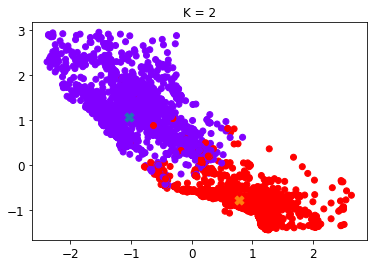

SSE:  162493.35776312675
Standard Deviation:  [0.8901618908967387, 0.842430647279467]


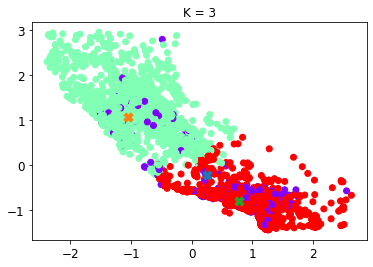

SSE:  130520.33147223367
Standard Deviation:  [1.432722452082112, 0.7998715756211221, 0.7460986207258342]


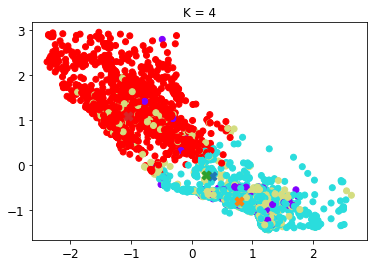

SSE:  120381.31103330085
Standard Deviation:  [2.275629530029979, 0.6713745396555274, 0.869763527666835, 0.8793328880064706]


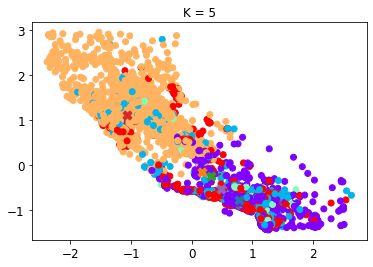

SSE:  110468.67021308496
Standard Deviation:  [0.652989450163923, 0.8806290919976139, 2.3244195433179216, 0.8070071878734758, 0.9273304961479942]


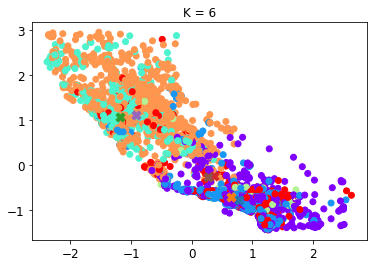

SSE:  104687.66925146726
Standard Deviation:  [0.7658379738830968, 0.8889143033598728, 0.7311020287211614, 2.526248544752351, 0.7172659774911099, 0.9459538269430314]


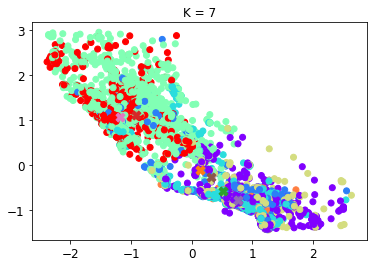

SSE:  99837.65259748936
Standard Deviation:  [0.5888320659107504, 1.0924735306249984, 1.0001850719928496, 0.8639618839764163, 0.7531905417925004, 2.8266092713284174, 0.7222928931041454]


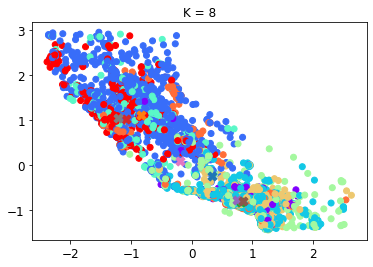

SSE:  96075.8354751259
Standard Deviation:  [2.303476514399752, 0.6444001034491971, 0.584086833062746, 1.184567088481584, 0.7288842225339814, 0.8417543523749794, 1.3549867707389556, 0.7111213549262883]


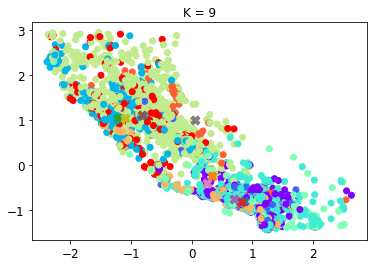

SSE:  89493.54584664619
Standard Deviation:  [0.8331768721681118, 2.301209346941863, 0.7172457862671527, 0.5670652533626073, 1.0200670290054956, 0.6479931568741322, 0.8965454711598438, 3.7462152953027537, 0.7963997840548726]


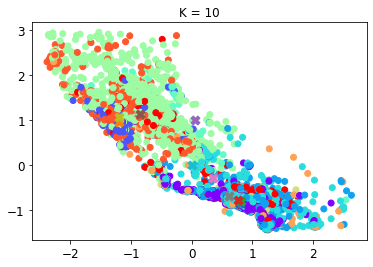

SSE:  85598.65916720171
Standard Deviation:  [0.7640994139164149, 0.8136856313129259, 0.6361822530308509, 0.5727045144742056, 3.7760980676454827, 0.8835153756017736, 2.8571610752261796, 0.9584714060517561, 0.7085332131362854, 1.168524430949577]


In [26]:
def main():
  print("kicking off execution")

if __name__ == "__main__":
  for k in range(2,11):
    cluster_california = K_means(housing_prepared,k,1)
    cent_matrix = cluster_california.create_cent_matrix()
    #print(cent_matrix, "Initial centroid matrix")
    #test_distance = cluster_california.calculate_distance(cent_matrix[0])
    # test_distance_matrix = cluster_california.create_dist_matrix(cent_matrix)
    # print(test_distance_matrix[1])
    prev_assignment = cluster_california.assignment(cent_matrix)
    rec_cent_matrix = cluster_california.recal_centroids(cent_matrix,prev_assignment)
    new_assignment = cluster_california.assignment(rec_cent_matrix)
    #iter = 0
    while prev_assignment != new_assignment:
      prev_assignment = new_assignment
      rec_cent_matrix = cluster_california.recal_centroids(rec_cent_matrix,prev_assignment)
      new_assignment = cluster_california.assignment(rec_cent_matrix)
      #iter = iter + 1
    #print(rec_cent_matrix)
    plt.scatter(x=housing_prepared[0:,0], y=housing_prepared[0:,1], c = new_assignment , cmap = "rainbow")
    for i in range(len(rec_cent_matrix)):
      plt.scatter(x=rec_cent_matrix[i][0], y=rec_cent_matrix[i][1],label = 1,marker='X', s = 80)
    plt.title('K = %i' %k)
    plt.show()
    print("SSE: " , cluster_california.SSE(rec_cent_matrix,new_assignment))
    print("Standard Deviation: ", cluster_california.stand_dev(rec_cent_matrix,new_assignment))

- - -
## 3. CLUSTERING HOUSING INTO REGIONS (40 pts)

Now that you have implemented the K-Means as the clustering algorithm. Applying the algorithm for k=2 clusters to see if you can split California into a Northern and Southern regions.

* **Cluster the data:** Report the SSE (sum squared error), cluster means, within cluster standard deviations for each attribute, etc. Visualize the clustering by plot the latitude along the X axis and longitude along the Y axis. You should get a plot that looks roughly in the shape of California (see Chapter 2 for more details). Using the cluster means and std. deviations as representative values in the cluster, what can you say about the clusters that were found? How do they compare with what you know about cities and areas in California? What can you attribute the gaps to? It will definitely be helpful to have a map of California handy.

* **Change the number of clusters:** Increase the value of k from 2 to 3,4,..,10 and repeat the clustering process above. Record cluster means and standard deviations. When you change k, do any additional patterns emerge? If so, what are they? Applying the algorithm for 10 clusters to see if it clearly identified the silicon valley area as one cluster (where houses are relatively new and expensive, median income is high), the area of San Francisco as another etc. While SF and Silicon Valley may have a somewhat similar profile (at least, compared with mid CA), they were separated mainly due to the latitude/longtitue properties, that involve a dimension of geographical cohesiveness.


In [4]:
# Your code goes here

"""
Done in the previous cell, I made it a part of my class for easier implementation so I could call it when I start a kmeans object
"""


In [5]:
#Question 4:
"""
The california housing crisis was spurred on by the rapid growth of tech companies and a quickly rising cost of living
associated with high paying jobs that flooded the region. Since there was such a large increase in well paying jobs, 
gentrification quickly took place in areas like San Francisco and the Silicon Valley that drove up the cost of housing 
while wages did not keep up with these rising costs of living. A solution to the housing crisis is to have rent controlled
housing to lock in current rental rates for the next few years so people have a chanve to catch up and actually get housing.
Another solution is for the government to build large scale housing projects such as apartment buildings to flood the market
with affordable housing options. Since the supply will go up, the markets will readjust and lower the price of housing.
"""

'\nThe california housing crisis was spurred on by the rapid growth of tech companies and a quickly rising cost of living\nassociated with high paying jobs that flooded the region. Since there was such a large increase in well paying jobs, \ngentrification quickly took place in areas like San Francisco and the Silicon Valley that drove up the cost of housing \nwhile wages did not keep up with these rising costs of living. A solution to the housing crisis is to have rent controlled\nhousing to lock in current rental rates for the next few years so people have a chanve to catch up and actually get housing.\nAnother solution is for the government to build large scale housing projects such as apartment buildings to flood the market\nwith affordable housing options. Since the supply will go up, the markets will readjust and lower the price of housing.\n'

- - -
## 4. WRITING ON THE INTUITION FOR THE CALIFORNIA HOUSING CRISIS (10 pts)

This question is a qualitative one, and is intended to let you experiment with a real world clustering task. Hopefully it gives you some intuition as for how the preset number of clusters affects the clustering results. Too few clusters may not reveal the information that is in the data. Too many clusters may hurt data analysis as well, as it may not generalize (and in this sense, it is equivalent to over fitting).

Write at least one paragraph to demonstrate your intuition on the California Housing Crisis. You might also want to mention some possible solutions to solve it. You will receive credits based upon your insights and intuitions on this challenge. 



- - - 
### NEED HELP?

In case you get stuck in any step in the process, you may find some useful information from:

 * Consult my lectures and/or the textbook
 * Talk to the TA, they are available and there to help you during their OH.
 * Come talk to me or email me <nn4pj@virginia.edu> with subject starting "CS4774 Assignment 2:...".

Best of luck and have fun!